In [1]:
%matplotlib inline
import os
import sys
from src.dataset.trans.data import *
from src.dataset.loader import *
from src.visualizer.draw import *

# TransNet Basics
This notebook shows some basic usages of TransNet.

## 1. Building transition dataset 
The core of TransNet is `TransDataset` class, which generates unified transition samples from the orignal annotations. To use it please provide the correct paths to the orignal annotations of JAAD, PIE and TITAN, build dataset in the dictionary form. Please follow the default form below. <br> 

In [2]:
anns_paths = {'JAAD': {'anns': 'DATA/annotations/JAAD/JAAD_DATA.pkl', 
                 'split': 'DATA/annotations/JAAD/splits'},
         'PIE': {'anns': 'DATA/annotations/PIE/PIE_DATA.pkl'},
         'TITAN': {'anns': 'DATA/annotations/TITAN/titan_0_4',
                   'split':'DATA/annotations/TITAN/splits' }
         }
trans_data = TransDataset(data_paths=anns_paths, image_set="train", verbose=False)

<b> Note </b>: Only provide the paths for the datasets to be used. `TransDataset` works normally with arbitrary subsets of supported datasets. For example, if you would like to use TITAN alone, just specify only the path to the annotations of TITAN.

In [3]:
anns_paths_titan = {'TITAN': {'anns': 'DATA/annotations/TITAN/titan_0_4',
                   'split':'DATA/annotations/TITAN/splits' }
         }
trans_data_titan = TransDataset(data_paths=anns_paths, image_set="train", verbose=False)

Additionally, `JAAD` dataset has three different setting of video splits, namely `defalut`, `all_videos` and `high_visibility`. Without specification we use 'default'. To change please use `subset` argument of `TranDataset`:

In [4]:
trans_data_jaad_all = TransDataset(data_paths=anns_paths, image_set="train", subset='all_videos',verbose=False)

Use `extract_trans_history()` to collect transition instances. You can use <b> mode </b> and <b> fps </b> to specify desired transtion type and sampling rate respectively.

In [5]:
samples = trans_data.extract_trans_history(mode='STOP', fps=10, verbose=True)

Extract 609 STOP history samples from train dataset,
samples contain 539 unique pedestrians and 33647 frames.


 `extract_trans_frame()` is for extracting the paticular frames where the transitions happen. 

In [6]:
samples_frame = trans_data.extract_trans_frame(mode='GO',verbose=True)

Extract 561 GO frame samples from train dataset,
samples contain 499 unique pedestrians.


## 2. Data loading
We provode customized PyTorch dataloader for data loading, namely `FrameDataset` for frame samples and `SequenceDataset` for history samples. Here we demonstrate how to use `SequenceDataset` (`torch.utils.data.Dataset`) for reading sequential images and annotations. <br>
First provide the path to the image root directory:

In [6]:
image_dir = 'DATA/images'

Use `SequenceDataset` to convert the dictionary of history samples into `torch.utils.data.Dataset`

In [7]:
sequences = SequenceDataset(samples, image_dir=image_dir, preprocess=None)

Now each history sample is in the form of stacked tensors. More precisely, every instance contains <br/>
* `image` : stacked tensors of size $L\times C\times H\times W$, where $L$ is the length of the history sequence, $C$, $H$, $W$ are the number of image channels, height and width respectively.
* `bbox`: $L$ bounding boxes of the targeted pedestrian using two-point coordinates (top-left, bottom-right) `[x1, y1, x2, y2]`. One per each frame.
* `id`: a string representing the id of indivisual sample, for example `TS_0266_train` indicates the <b>266</b>th  "<b>S</b>TOP" transition sample from <b>T</b>ITAN <b>training</b> set.



Now let's do some visualizations. First choose one instance among the history samples:

In [8]:
history_sample = sequences.__getitem__(604) # choose one history sample

check the dimensions and sample id:

In [9]:
print("The size of image tensors: ", history_sample['image'].size())
print("The number of bounding bboxs:  ", len(history_sample['bbox']))
print("sample id: ", history_sample['id'])

The size of image tensors:  torch.Size([113, 3, 1520, 2704])
The number of bounding bboxs:   113
sample id:  TS_0266_train


You can use `BaseVisualizer` to visualize the history sample:

In [10]:
visualizer = BaseVisualizer(history_sample)

To show a specific frame, for example plot the 100th image in the history sample use `show_frame()`

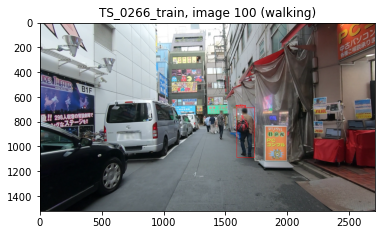

In [11]:
visualizer.show_frame(k=100, title=None)

or you can use `show_history()` to view the entire sequence:

In [12]:
visualizer.show_history(wait_key=0)

To loop through all the examples you can simply use `torch.utils.data.DataLoader` 

In [ ]:
train_loader = torch.utils.data.DataLoader(samples,batch_size=1, shuffle=True)